In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from utils.pluto_utils import PlutoData

In [3]:
import sys
sys.path.append(os.path.join(os.getcwd(),'Kea'))
# from Kea.statistics import statistics_base

from Kea.simulator import fbm
from Kea.statistics.statfunc import statfunc_base, strfn
from Kea.statistics.spectra import spectra_base

# Load data

In [9]:
output_dir = "/home/yangelaxue/Documents/VUW/pluto_runs/HD/Blast"

In [10]:
data = PlutoData(output_dir)
data.__dict__

{'output_dir': '/home/yangelaxue/Documents/VUW/pluto_runs/HD/Blast',
 'ndim': 3,
 'Units': <utils.pluto_utils.PlutoUnits at 0x7085812f0cb0>}

In [11]:
units = 'code'

In [12]:
if data.ndim==2:
    X, Y = data.load_domain_from_HDF5(units=units)
elif data.ndim==3:
    X, Y, Z = data.load_domain_from_HDF5(units=units)
times = data.load_times(units=units)

In [13]:
shape = X.shape
# if data.ndim==2:
#     L = (X.max()-X.min(), Y.max()-Y.min())
# elif data.ndim==3:
#     L = (X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min())
L = (10., 10.)

In [14]:
rho = data.load_data_from_HDF5('rho',units=units)

In [15]:
vx1 = data.load_data_from_HDF5('vx1',units=units)
vx2 = data.load_data_from_HDF5('vx2',units=units)

if data.ndim==2:
    v = [(_vx1**2 + _vx2**2)**.5 for _vx1,_vx2 in zip(vx1,vx2)]
elif data.ndim>2:
    vx3 = data.load_data_from_HDF5('vx3',units=units)
    v = [(_vx1**2 + _vx2**2 + _vx3**2)**.5 for _vx1,_vx2,_vx3 in zip(vx1,vx2,vx3)]

In [16]:
try:
    prs = data.load_data_from_HDF5('prs',units=units)
    prs_bool = True
except:
    prs_bool = False
    print("Pressure is not part of the simulation.")

In [17]:
try:
    Bx1 = data.load_data_from_HDF5('Bx1',units=units)
    Bx2 = data.load_data_from_HDF5('Bx2',units=units)
    
    if data.ndim==2:
        B = [(_Bx1**2 + _Bx2**2)**.5 for _Bx1,_Bx2 in zip(Bx1,Bx2)]
    elif data.ndim>2:
        Bx3 = data.load_data_from_HDF5('Bx3',units='code')
        B = [(_Bx1**2 + _Bx2**2 + _Bx3**2)**.5 for _Bx1,_Bx2,_Bx3 in zip(Bx1,Bx2,Bx3)]
    B_bool = True
except:
    B_bool = False
    print("Magnetism is not part of the simulation.")

Magnetism is not part of the simulation.


# Plot data

In [18]:
var = v[-1]

ValueError: cannot reshape array of size 262144 into shape (1,64)

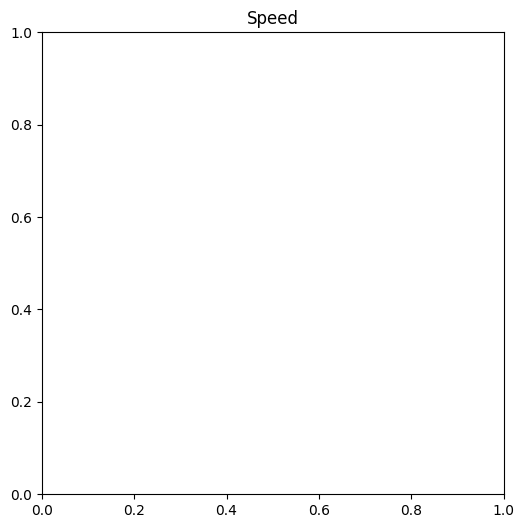

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))

ax.set_aspect('equal')
ax.set_title("Speed")

im = ax.pcolormesh(X, Y, var,cmap='Blues')

fig.colorbar(im, shrink=.8)
plt.show()

# Analyse data

In [30]:
# Get lag vectors
Xs, Ys = np.meshgrid(*(np.linspace(-L_x,L_x,2*shape_x+1) for shape_x, L_x in zip(X.shape, L)), indexing='xy')
lagvecs = statfunc_base.get_all_lagvecs(tuple(2*shape_x+1 for shape_x in X.shape))
# Calculate 2nd-order structure function
structure2 = strfn.process_lags(var, var, lagvecs, periodic=True, lenn=L, shape=tuple(2*shape_x+1 for shape_x in X.shape), orders=[2])

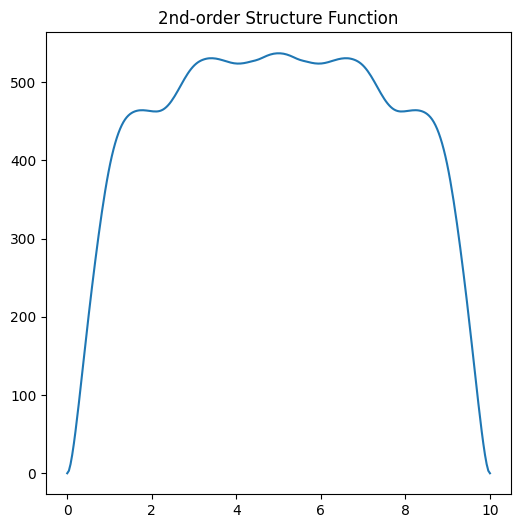

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))

# ax.set_aspect('equal')
ax.set_title("2nd-order Structure Function")

im = ax.plot(Xs[0][shape[0]:], structure2[0][shape[0]:])

plt.show()

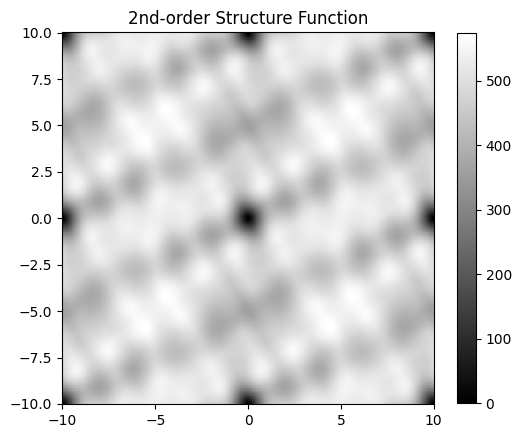

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))

ax.set_aspect('equal')
ax.set_title("2nd-order Structure Function")

im = ax.pcolormesh(Xs, Ys, structure2,cmap='gray')

fig.colorbar(im, shrink=.8)
plt.show()

In [21]:
dk = 2*np.pi/L[0]

/home/yangelaxue/clusters/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


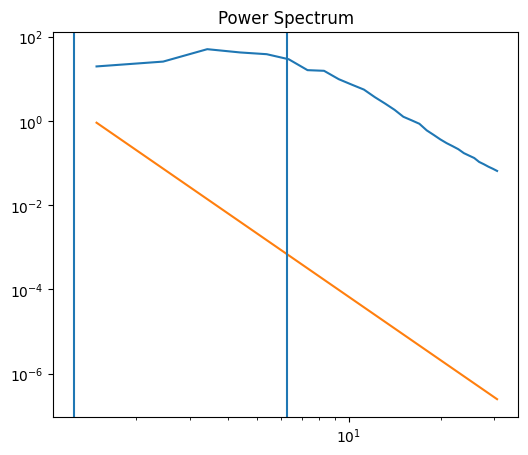

In [22]:
k, P, Tr = spectra_base.calculate_integrated_spectrum([v[-1]])

fig, ax = plt.subplots(1, 1, figsize=(6,5))

# ax.set_aspect('equal')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title("Power Spectrum")

ax.plot(k, P)
ax.plot(k, P[0]*k**-5/3)
# ax.plot(k, P[0]*k**-1)
ax.axvline(2*dk)
ax.axvline(10*dk)

plt.show()

In [23]:
k, P, Tr = spectra_base.calculate_integrated_spectrum([v[-1]])

/home/yangelaxue/clusters/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [54]:
len(v)

101